# Project 2: Jay Frothingham

## Setup

In [1]:
# import statements
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import seaborn as sb # a new plotting library

In [2]:
# these set the pandas defaults so that it will print ALL values, even for very long lists and large dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
# filtering function
def filter(dataframe, col_name, value):
    """
    This function takes a dataframe, column name, and value.
    Returns a new dataframe that only includes rows where col_name==value.
    """
    filtered = dataframe[(dataframe[col_name]==value)]
    
    return filtered

In [4]:
## read in the dataset here
data = pd.read_csv('planets_032821.csv', skiprows=126)
print(data.shape)

# print first few rows as a test
data[0:3]

(29377, 121)


,rowid,pl_name,hostname,pl_letter,hd_name,hip_name,tic_id,gaia_id,default_flag,sy_snum,sy_pnum,sy_mnum,cb_flag,discoverymethod,disc_year,disc_refname,disc_pubdate,disc_locale,disc_facility,disc_telescope,disc_instrument,rv_flag,pul_flag,ptv_flag,tran_flag,ast_flag,obm_flag,micro_flag,etv_flag,ima_flag,dkin_flag,soltype,pl_controv_flag,pl_refname,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_masse,pl_massj,pl_msinie,pl_msinij,pl_cmasse,pl_cmassj,pl_bmasse,pl_bmassj,pl_bmassprov,pl_dens,pl_orbeccen,pl_insol,pl_eqt,pl_orbincl,pl_tranmid,pl_tsystemref,ttv_flag,pl_imppar,pl_trandep,pl_trandur,pl_ratdor,pl_ratror,pl_occdep,pl_orbtper,pl_orblper,pl_rvamp,pl_projobliq,pl_trueobliq,st_refname,st_spectype,st_teff,st_rad,st_mass,st_met,st_metratio,st_lum,st_logg,st_age,st_dens,st_vsin,st_rotp,st_radv,sy_refname,rastr,ra,decstr,dec,glat,glon,elat,elon,sy_pm,sy_pmra,sy_pmdec,sy_dist,sy_plx,sy_bmag,sy_vmag,sy_jmag,sy_hmag,sy_kmag,sy_umag,sy_gmag,sy_rmag,sy_imag,sy_zmag,sy_w1mag,sy_w2mag,sy_w3mag,sy_w4mag,sy_gaiamag,sy_icmag,sy_tmag,sy_kepmag,rowupdate,pl_pubdate,releasedate,pl_nnotes,st_nphot,st_nrvc,st_nspec,pl_nespec,pl_ntranspec
0,1,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,0,2,1,0,0,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2008-01,Ground,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,1,0,0,0,0,0,0,0,0,0,Published Confirmed,0,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,1.21,NaN,NaN,NaN,NaN,5434.70,17.1,NaN,NaN,5434.70,17.1,Msini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=KUNITOMO_ET_AL__2011 href=https://ui...,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28055,264.1407,18.33377,177.4224,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2014-07-23,2011-08,2014-07-23,2,1,2,0,0,0
1,2,11 Com b,11 Com,b,HD 107383,HIP 60202,TIC 72437047,Gaia DR2 3946945413106333696,1,2,1,0,0,Radial Velocity,2007,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,2008-01,Ground,Xinglong Station,2.16 m Telescope,Coude Echelle Spectrograph,1,0,0,0,0,0,0,0,0,0,Published Confirmed,0,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,326.03,1.29,NaN,NaN,NaN,NaN,6165.60,19.4,NaN,NaN,6165.60,19.4,Msini,NaN,0.231,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2452899.60,94.80,302.8,NaN,NaN,<a refstr=LIU_ET_AL__2008 href=https://ui.adsa...,G8 III,4742.0,19.00,2.7,-0.35,[Fe/H],2.243,2.31,NaN,NaN,1.2,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,12h20m42.91s,185.178779,+17d47m35.71s,17.793252,78.28055,264.1407,18.33377,177.4224,140.383627,-109.24100,88.1701,93.1846,10.71040,5.726,4.72307,2.943,2.484,2.282,NaN,NaN,NaN,NaN,NaN,0.639,0.732,2.358,2.270,4.44038,NaN,3.83790,NaN,2014-05-14,2008-01,2014-05-14,2,1,2,0,0,0
2,3,11 UMi b,11 UMi,b,HD 136726,HIP 74793,TIC 230061010,Gaia DR2 1696798367260229376,0,1,1,0,0,Radial Velocity,2009,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,2009-10,Ground,Thueringer Landessternwarte Tautenburg,2.0 m Alfred Jensch Telescope,Coude Echelle Spectrograph,1,0,0,0,0,0,0,0,0,0,Published Confirmed,0,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,516.22,1.54,NaN,NaN,NaN,NaN,3337.07,10.5,NaN,NaN,3337.07,10.5,Msini,NaN,0.080,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,2452861.04,117.63,189.7,NaN,NaN,<a refstr=DOLLINGER_ET_AL__2009 href=https://u...,K4 III,4340.0,24.08,1.8,0.04,[Fe/H],NaN,1.60,1.56,NaN,1.5,NaN,NaN,<a refstr=STASSUN_ET_AL__2019 href=https://ui....,15h17m05.90s,229.274595,+71d49m26.19s,71.823943,41.04441,108.7190,74.95820,141.6472,10.679019,3.42996,10.1132,125.3210,7.95388,6.382,5.01300,2.876,2.091,1.939,NaN,NaN,NaN,NaN,NaN,-0.290,0.143,1.894,1.787,4.56216,NaN,3.82294,NaN,2018-04-25,2009-10,2014-05-14,0,1,1,0,0,0


## Are larger stars more likely to have multiple exoplanets?

In [5]:
# check what planet quantities the dataset contains
pd.unique(data['sy_pnum'].values)

array([1, 2, 3, 5, 4, 6, 8, 7], dtype=int64)

In [6]:
# separate out into different populations by mass
pl_1 = filter(data, 'sy_pnum', 1)
count_1 = pl_1['st_mass'].values.size
print('systems with one planet:', count_1)

pl_2 = filter(data, 'sy_pnum', 2)
count_2 = pl_2['st_mass'].values.size
print('systems with two planets:', count_2)

pl_3 = filter(data, 'sy_pnum', 3)
count_3 = pl_3['st_mass'].values.size
print('systems with three planets:', count_3)

pl_4 = filter(data, 'sy_pnum', 4)
count_4 = pl_4['st_mass'].values.size
print('systems with four planets:', count_4)

pl_5 = filter(data, 'sy_pnum', 5)
count_5 = pl_5['st_mass'].values.size
print('systems with five planets:', count_5)

pl_6 = filter(data, 'sy_pnum', 6)
count_6 = pl_6['st_mass'].values.size
print('systems with six planets:', count_6)

pl_7 = filter(data, 'sy_pnum', 7)
count_7 = pl_7['st_mass'].values.size
print('systems with seven planets:', count_7)

pl_8 = filter(data, 'sy_pnum', 8)
count_8 = pl_8['st_mass'].values.size
print('systems with eight planets:', count_8)

systems with one planet: 15034
systems with two planets: 7152
systems with three planets: 3827
systems with four planets: 2004
systems with five planets: 1011
systems with six planets: 268
systems with seven planets: 19
systems with eight planets: 62


In [7]:
# check what discovery method the dataset contains
pd.unique(data['discoverymethod'].values)

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Disk Kinematics',
       'Orbital Brightness Modulation', 'Pulsation Timing Variations',
       'Microlensing', 'Transit Timing Variations', 'Pulsar Timing'],
      dtype=object)

In [8]:
# separate into different subpopulations by discovery method
rv1 = filter(pl_1, 'discoverymethod', 'Radial Velocity')
im1 = filter(pl_1, 'discoverymethod', 'Imaging')
ect1 = filter(pl_1, 'discoverymethod', 'Eclipse Timing Variations')
tran1 = filter(pl_1, 'discoverymethod', 'Transit')
ast1 = filter(pl_1, 'discoverymethod', 'Astrometry')
disk1 = filter(pl_1, 'discoverymethod', 'Disk Kinematics')
obm1 = filter(pl_1, 'discoverymethod', 'Orbital Brightness Modulation')
ptv1 = filter(pl_1, 'discoverymethod', 'Pulsation Timing Variations')
mic1 = filter(pl_1, 'discoverymethod', 'Microlensing')
ttv1 = filter(pl_1, 'discoverymethod', 'Transit Timing Variations')
pult1 = filter(pl_1, 'discoverymethod', 'Pulsar Timing')

rv2 = filter(pl_2, 'discoverymethod', 'Radial Velocity')
im2 = filter(pl_2, 'discoverymethod', 'Imaging')
ect2 = filter(pl_2, 'discoverymethod', 'Eclipse Timing Variations')
tran2 = filter(pl_2, 'discoverymethod', 'Transit')
ast2 = filter(pl_2, 'discoverymethod', 'Astrometry')
disk2 = filter(pl_2, 'discoverymethod', 'Disk Kinematics')
obm2 = filter(pl_2, 'discoverymethod', 'Orbital Brightness Modulation')
ptv2 = filter(pl_2, 'discoverymethod', 'Pulsation Timing Variations')
mic2 = filter(pl_2, 'discoverymethod', 'Microlensing')
ttv2 = filter(pl_2, 'discoverymethod', 'Transit Timing Variations')
pult2 = filter(pl_2, 'discoverymethod', 'Pulsar Timing')

rv3 = filter(pl_3, 'discoverymethod', 'Radial Velocity')
im3 = filter(pl_3, 'discoverymethod', 'Imaging')
ect3 = filter(pl_3, 'discoverymethod', 'Eclipse Timing Variations')
tran3 = filter(pl_3, 'discoverymethod', 'Transit')
ast3 = filter(pl_3, 'discoverymethod', 'Astrometry')
disk3 = filter(pl_3, 'discoverymethod', 'Disk Kinematics')
obm3 = filter(pl_3, 'discoverymethod', 'Orbital Brightness Modulation')
ptv3 = filter(pl_3, 'discoverymethod', 'Pulsation Timing Variations')
mic3 = filter(pl_3, 'discoverymethod', 'Microlensing')
ttv3 = filter(pl_3, 'discoverymethod', 'Transit Timing Variations')
pult3 = filter(pl_3, 'discoverymethod', 'Pulsar Timing')

rv4 = filter(pl_4, 'discoverymethod', 'Radial Velocity')
im4 = filter(pl_4, 'discoverymethod', 'Imaging')
ect4 = filter(pl_4, 'discoverymethod', 'Eclipse Timing Variations')
tran4 = filter(pl_4, 'discoverymethod', 'Transit')
ast4 = filter(pl_4, 'discoverymethod', 'Astrometry')
disk4 = filter(pl_4, 'discoverymethod', 'Disk Kinematics')
obm4 = filter(pl_4, 'discoverymethod', 'Orbital Brightness Modulation')
ptv4 = filter(pl_4, 'discoverymethod', 'Pulsation Timing Variations')
mic4 = filter(pl_4, 'discoverymethod', 'Microlensing')
ttv4 = filter(pl_4, 'discoverymethod', 'Transit Timing Variations')
pult4 = filter(pl_4, 'discoverymethod', 'Pulsar Timing')

rv5 = filter(pl_5, 'discoverymethod', 'Radial Velocity')
im5 = filter(pl_5, 'discoverymethod', 'Imaging')
ect5 = filter(pl_5, 'discoverymethod', 'Eclipse Timing Variations')
tran5 = filter(pl_5, 'discoverymethod', 'Transit')
ast5 = filter(pl_5, 'discoverymethod', 'Astrometry')
disk5 = filter(pl_5, 'discoverymethod', 'Disk Kinematics')
obm5 = filter(pl_5, 'discoverymethod', 'Orbital Brightness Modulation')
ptv5 = filter(pl_5, 'discoverymethod', 'Pulsation Timing Variations')
mic5 = filter(pl_5, 'discoverymethod', 'Microlensing')
ttv5 = filter(pl_5, 'discoverymethod', 'Transit Timing Variations')
pult5 = filter(pl_5, 'discoverymethod', 'Pulsar Timing')

rv6 = filter(pl_6, 'discoverymethod', 'Radial Velocity')
im6 = filter(pl_6, 'discoverymethod', 'Imaging')
ect6 = filter(pl_6, 'discoverymethod', 'Eclipse Timing Variations')
tran6 = filter(pl_6, 'discoverymethod', 'Transit')
ast6 = filter(pl_6, 'discoverymethod', 'Astrometry')
disk6 = filter(pl_6, 'discoverymethod', 'Disk Kinematics')
obm6 = filter(pl_6, 'discoverymethod', 'Orbital Brightness Modulation')
ptv6 = filter(pl_6, 'discoverymethod', 'Pulsation Timing Variations')
mic6 = filter(pl_6, 'discoverymethod', 'Microlensing')
ttv6 = filter(pl_6, 'discoverymethod', 'Transit Timing Variations')
pult6 = filter(pl_6, 'discoverymethod', 'Pulsar Timing')

rv7 = filter(pl_7, 'discoverymethod', 'Radial Velocity')
im7 = filter(pl_7, 'discoverymethod', 'Imaging')
ect7 = filter(pl_7, 'discoverymethod', 'Eclipse Timing Variations')
tran7 = filter(pl_7, 'discoverymethod', 'Transit')
ast7 = filter(pl_7, 'discoverymethod', 'Astrometry')
disk7 = filter(pl_7, 'discoverymethod', 'Disk Kinematics')
obm7 = filter(pl_7, 'discoverymethod', 'Orbital Brightness Modulation')
ptv7 = filter(pl_7, 'discoverymethod', 'Pulsation Timing Variations')
mic7 = filter(pl_7, 'discoverymethod', 'Microlensing')
ttv7 = filter(pl_7, 'discoverymethod', 'Transit Timing Variations')
pult7 = filter(pl_7, 'discoverymethod', 'Pulsar Timing')

rv8 = filter(pl_8, 'discoverymethod', 'Radial Velocity')
im8 = filter(pl_8, 'discoverymethod', 'Imaging')
ect8 = filter(pl_8, 'discoverymethod', 'Eclipse Timing Variations')
tran8 = filter(pl_8, 'discoverymethod', 'Transit')
ast8 = filter(pl_8, 'discoverymethod', 'Astrometry')
disk8 = filter(pl_8, 'discoverymethod', 'Disk Kinematics')
obm8 = filter(pl_8, 'discoverymethod', 'Orbital Brightness Modulation')
ptv8 = filter(pl_8, 'discoverymethod', 'Pulsation Timing Variations')
mic8 = filter(pl_8, 'discoverymethod', 'Microlensing')
ttv8 = filter(pl_8, 'discoverymethod', 'Transit Timing Variations')
pult8 = filter(pl_8, 'discoverymethod', 'Pulsar Timing')

In [9]:
# stellar masses for each population - split by number of planets and then again by detection method

st_mass1 = pl_1['st_mass'].values

rv_mass1 = rv1['st_mass'].values
im_mass1 = im1['st_mass'].values
ect_mass1 = ect1['st_mass'].values
tran_mass1 = tran1['st_mass'].values
ast_mass1 = ast1['st_mass'].values
disk_mass1 = disk1['st_mass'].values
obm_mass1 = obm1['st_mass'].values
ptv_mass1 = ptv1['st_mass'].values
mic_mass1 = mic1['st_mass'].values
ttv_mass1 = ttv1['st_mass'].values
pult_mass1 = pult1['st_mass'].values


st_mass2 = pl_2['st_mass'].values

rv_mass2 = rv2['st_mass'].values
im_mass2 = im2['st_mass'].values
ect_mass2 = ect2['st_mass'].values
tran_mass2 = tran2['st_mass'].values
ast_mass2 = ast2['st_mass'].values
disk_mass2 = disk2['st_mass'].values
obm_mass2 = obm2['st_mass'].values
ptv_mass2 = ptv2['st_mass'].values
mic_mass2 = mic2['st_mass'].values
ttv_mass2 = ttv2['st_mass'].values
pult_mass2 = pult2['st_mass'].values


st_mass3 = pl_3['st_mass'].values

rv_mass3 = rv3['st_mass'].values
im_mass3 = im3['st_mass'].values
ect_mass3 = ect3['st_mass'].values
tran_mass3 = tran3['st_mass'].values
ast_mass3 = ast3['st_mass'].values
disk_mass3 = disk3['st_mass'].values
obm_mass3 = obm3['st_mass'].values
ptv_mass3 = ptv3['st_mass'].values
mic_mass3 = mic3['st_mass'].values
ttv_mass3 = ttv3['st_mass'].values
pult_mass3 = pult3['st_mass'].values


st_mass4 = pl_4['st_mass'].values

rv_mass4 = rv4['st_mass'].values
im_mass4 = im4['st_mass'].values
ect_mass4 = ect4['st_mass'].values
tran_mass4 = tran4['st_mass'].values
ast_mass4 = ast4['st_mass'].values
disk_mass4 = disk4['st_mass'].values
obm_mass4 = obm4['st_mass'].values
ptv_mass4 = ptv4['st_mass'].values
mic_mass4 = mic4['st_mass'].values
ttv_mass4 = ttv4['st_mass'].values
pult_mass4 = pult4['st_mass'].values

st_mass5 = pl_5['st_mass'].values

rv_mass5 = rv5['st_mass'].values
im_mass5 = im5['st_mass'].values
ect_mass5 = ect5['st_mass'].values
tran_mass5 = tran5['st_mass'].values
ast_mass5 = ast5['st_mass'].values
disk_mass5 = disk5['st_mass'].values
obm_mass5 = obm5['st_mass'].values
ptv_mass5 = ptv5['st_mass'].values
mic_mass5 = mic5['st_mass'].values
ttv_mass5 = ttv5['st_mass'].values
pult_mass5 = pult5['st_mass'].values

st_mass6 = pl_6['st_mass'].values

rv_mass6 = rv6['st_mass'].values
im_mass6 = im6['st_mass'].values
ect_mass6 = ect6['st_mass'].values
tran_mass6 = tran6['st_mass'].values
ast_mass6 = ast6['st_mass'].values
disk_mass6 = disk6['st_mass'].values
obm_mass6 = obm6['st_mass'].values
ptv_mass6 = ptv6['st_mass'].values
mic_mass6 = mic6['st_mass'].values
ttv_mass6 = ttv6['st_mass'].values
pult_mass6 = pult6['st_mass'].values

st_mass7 = pl_7['st_mass'].values

rv_mass7 = rv7['st_mass'].values
im_mass7 = im7['st_mass'].values
ect_mass7 = ect7['st_mass'].values
tran_mass7 = tran7['st_mass'].values
ast_mass7 = ast7['st_mass'].values
disk_mass7 = disk7['st_mass'].values
obm_mass7 = obm7['st_mass'].values
ptv_mass7 = ptv7['st_mass'].values
mic_mass7 = mic7['st_mass'].values
ttv_mass7 = ttv7['st_mass'].values
pult_mass7 = pult7['st_mass'].values

st_mass8 = pl_8['st_mass'].values

rv_mass8 = rv8['st_mass'].values
im_mass8 = im8['st_mass'].values
ect_mass8 = ect8['st_mass'].values
tran_mass8 = tran8['st_mass'].values
ast_mass8 = ast8['st_mass'].values
disk_mass8 = disk8['st_mass'].values
obm_mass8 = obm8['st_mass'].values
ptv_mass8 = ptv8['st_mass'].values
mic_mass8 = mic8['st_mass'].values
ttv_mass8 = ttv8['st_mass'].values
pult_mass8 = pult8['st_mass'].values

In [10]:
# function to find frequency of each value in an array
def find_freq(values):
    """
    This function finds the frequency of values in an array.
    It takes an array of values.
    It returns an array of frequencies.
    Useful for plotting distributions on plots other than histograms.
    """
    i = 0
    freq = np.zeros(values.size)
    
    for v in values:
        freq[i] = np.count_nonzero(values==v)
        i = i+1
    
    return freq

In [11]:
# find frequency of masses for each population - split by number of planets and then again by detection method

freq1 = find_freq(st_mass1)

rv_freq1 = find_freq(rv_mass1)
im_freq1 = find_freq(im_mass1)
ect_freq1 = find_freq(ect_mass1)
tran_freq1 = find_freq(tran_mass1)
ast_freq1 = find_freq(ast_mass1)
disk_freq1 = find_freq(disk_mass1)
obm_freq1 = find_freq(obm_mass1)
ptv_freq1 = find_freq(ptv_mass1)
mic_freq1 = find_freq(mic_mass1)
ttv_freq1 = find_freq(ttv_mass1)
pult_freq1 = find_freq(pult_mass1)


freq2 = find_freq(st_mass2)

rv_freq2 = find_freq(rv_mass2)
im_freq2 = find_freq(im_mass2)
ect_freq2 = find_freq(ect_mass2)
tran_freq2 = find_freq(tran_mass2)
ast_freq2 = find_freq(ast_mass2)
disk_freq2 = find_freq(disk_mass2)
obm_freq2 = find_freq(obm_mass2)
ptv_freq2 = find_freq(ptv_mass2)
mic_freq2 = find_freq(mic_mass2)
ttv_freq2 = find_freq(ttv_mass2)
pult_freq2 = find_freq(pult_mass2)

freq3 = find_freq(st_mass3)

rv_freq3 = find_freq(rv_mass3)
im_freq3 = find_freq(im_mass3)
ect_freq3 = find_freq(ect_mass3)
tran_freq3 = find_freq(tran_mass3)
ast_freq3 = find_freq(ast_mass3)
disk_freq3 = find_freq(disk_mass3)
obm_freq3 = find_freq(obm_mass3)
ptv_freq3 = find_freq(ptv_mass3)
mic_freq3 = find_freq(mic_mass3)
ttv_freq3 = find_freq(ttv_mass3)
pult_freq3 = find_freq(pult_mass3)


freq4 = find_freq(st_mass4)

rv_freq4 = find_freq(rv_mass4)
im_freq4 = find_freq(im_mass4)
ect_freq4 = find_freq(ect_mass4)
tran_freq4 = find_freq(tran_mass4)
ast_freq4 = find_freq(ast_mass4)
disk_freq4 = find_freq(disk_mass4)
obm_freq4 = find_freq(obm_mass4)
ptv_freq4 = find_freq(ptv_mass4)
mic_freq4 = find_freq(mic_mass4)
ttv_freq4 = find_freq(ttv_mass4)
pult_freq4 = find_freq(pult_mass4)


freq5 = find_freq(st_mass5)

rv_freq5 = find_freq(rv_mass5)
im_freq5 = find_freq(im_mass5)
ect_freq5 = find_freq(ect_mass5)
tran_freq5 = find_freq(tran_mass5)
ast_freq5 = find_freq(ast_mass5)
disk_freq5 = find_freq(disk_mass5)
obm_freq5 = find_freq(obm_mass5)
ptv_freq5 = find_freq(ptv_mass5)
mic_freq5 = find_freq(mic_mass5)
ttv_freq5 = find_freq(ttv_mass5)
pult_freq5 = find_freq(pult_mass5)


freq6 = find_freq(st_mass6)

rv_freq6 = find_freq(rv_mass6)
im_freq6 = find_freq(im_mass6)
ect_freq6 = find_freq(ect_mass6)
tran_freq6 = find_freq(tran_mass6)
ast_freq6 = find_freq(ast_mass6)
disk_freq6 = find_freq(disk_mass6)
obm_freq6 = find_freq(obm_mass6)
ptv_freq6 = find_freq(ptv_mass6)
mic_freq6 = find_freq(mic_mass6)
ttv_freq6 = find_freq(ttv_mass6)
pult_freq6 = find_freq(pult_mass6)


freq7 = find_freq(st_mass7)

rv_freq7 = find_freq(rv_mass7)
im_freq7 = find_freq(im_mass7)
ect_freq7 = find_freq(ect_mass7)
tran_freq7 = find_freq(tran_mass7)
ast_freq7 = find_freq(ast_mass7)
disk_freq7 = find_freq(disk_mass7)
obm_freq7 = find_freq(obm_mass7)
ptv_freq7 = find_freq(ptv_mass7)
mic_freq7 = find_freq(mic_mass7)
ttv_freq7 = find_freq(ttv_mass7)
pult_freq7 = find_freq(pult_mass7)


freq8 = find_freq(st_mass8)

rv_freq8 = find_freq(rv_mass8)
im_freq8 = find_freq(im_mass8)
ect_freq8 = find_freq(ect_mass8)
tran_freq8 = find_freq(tran_mass8)
ast_freq8 = find_freq(ast_mass8)
disk_freq8 = find_freq(disk_mass8)
obm_freq8 = find_freq(obm_mass8)
ptv_freq8 = find_freq(ptv_mass8)
mic_freq8 = find_freq(mic_mass8)
ttv_freq8 = find_freq(ttv_mass8)
pult_freq8 = find_freq(pult_mass8)

In [12]:
# find mean mass for each population
mean1 = np.nanmean(st_mass1)
mean2 = np.nanmean(st_mass2)
mean3 = np.nanmean(st_mass3)
mean4 = np.nanmean(st_mass4)
mean5 = np.nanmean(st_mass5)
mean6 = np.nanmean(st_mass6)
mean7 = np.nanmean(st_mass7)
mean8 = np.nanmean(st_mass8)

means = np.array([mean2, mean2, mean3, mean4, mean5, mean6, mean7, mean8])

In [13]:
# need to define this to fit parameters 
def func(x, a, b, c):
    """
    This defines an exponential decay function. 
    Takes in parameters for the function's scale, exponential term, and offset as well as an array of x-values.
    Returns the y-values of the defined function for the given x-values.
    """
    return a * np.exp(-b * x) + c

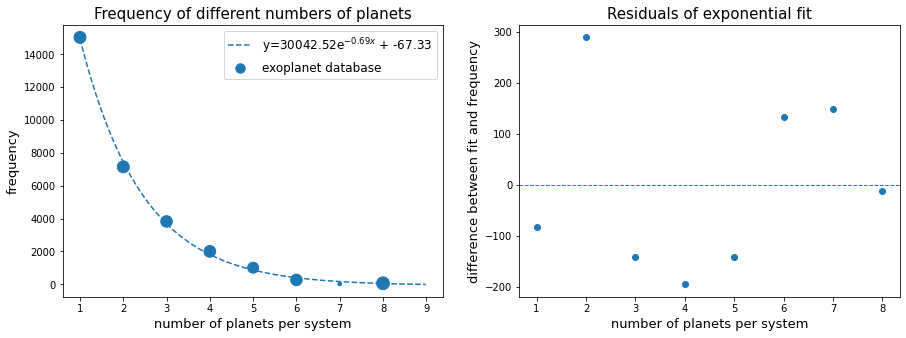

In [14]:
# plot number of systems w/ different numbers of planets

numbers = np.arange(1,9) # possible populations of planets
counts = [count_1, count_2, count_3, count_4, count_5, count_6, count_7, count_8] # number of systems for different populations
xrange = np.arange(1,9, 0.01) # smaller increments to plot smooth fit function

# find a best-fit exponential decay function for the data and calculate its residuals
fit_param = curve_fit(func, numbers, counts)
fit = func(xrange, fit_param[0][0], fit_param[0][1], fit_param[0][2])
fit_func = str(np.round(fit_param[0][0],2))+'e$^{-'+str(np.round(fit_param[0][1],2))+'x}$ + '+str(np.round(fit_param[0][2],2))
fit_resid = func(numbers, fit_param[0][0], fit_param[0][1], fit_param[0][2]) - counts

plt.figure(figsize=(15,5))

# plot the data and the fit
plt.subplot(1,2,1)
plt.title('Frequency of different numbers of planets',fontsize=15)
plt.xlabel('number of planets per system',fontsize=13)
plt.ylabel('frequency',fontsize=13)
plt.scatter(numbers, counts, s=means*150,label='exoplanet database')
plt.plot(xrange, fit, '--', label='y='+fit_func)
plt.legend(fontsize=12)

# plot the residuals
plt.subplot(1,2,2)
plt.title('Residuals of exponential fit', fontsize=15)
plt.xlabel('number of planets per system', fontsize=13)
plt.ylabel('difference between fit and frequency', fontsize=13)
plt.scatter(numbers, fit_resid)
plt.axhline(0,lw=1,ls='--')

In [15]:
# calculate the weight of each population by how many different stellar masses it has
weight_total = freq1.size + freq2.size + freq3.size + freq4.size + freq5.size + freq6.size + freq7.size + freq8.size

weight1 = freq1.size / weight_total
weight2 = freq2.size / weight_total
weight3 = freq3.size / weight_total
weight4 = freq4.size / weight_total
weight5 = freq5.size / weight_total
weight6 = freq6.size / weight_total
weight7 = freq7.size / weight_total
weight8 = freq8.size / weight_total

weights = np.array([weight1, weight2, weight3, weight4, weight5, weight6, weight7, weight8])
weights # check that values are reasonable

array([0.5117609 , 0.24345576, 0.13027198, 0.06821663, 0.03441468,
       0.00912278, 0.00064676, 0.00211049])

LinregressResult(slope=-0.04196085267283277, intercept=1.0113984787549, rvalue=-0.33319230678797024, pvalue=0.4199620367310864, stderr=0.04847528986380223) 

Null hypothesis: linear slope of zero. 
 Constant mean stellar mass for different populations.
p-value = 0.42 



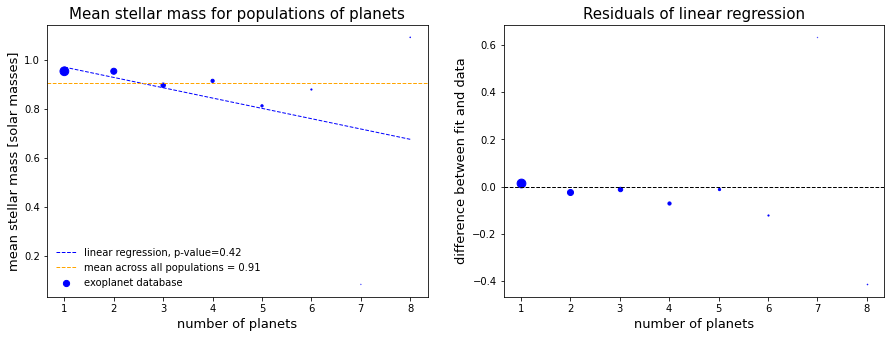

In [16]:
# calculate and print linear regression fit
meanfit = st.linregress(numbers, means)
print(meanfit,'\n')
print("Null hypothesis: linear slope of zero. \n Constant mean stellar mass for different populations.")
print("p-value =",np.round(meanfit[3],2), '\n')

# from linregress documentation: 
# returns the p-value for a hypothesis test whose null hypothesis is that the slope is zero
# so a high p-value indicates slope near zero

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Mean stellar mass for populations of planets',fontsize=15)
plt.xlabel('number of planets',fontsize=13)
plt.ylabel('mean stellar mass [solar masses]',fontsize=13)

# plot mean masses for different populations, with markersize weighted by number of datapoints
plt.scatter(numbers, means, s=weights*150,c='b',label='exoplanet database')

# plot linear regression fit
plt.plot(numbers, (numbers*meanfit[0])+meanfit[1],'b--', lw=1,label='linear regression, p-value='+str(np.round(meanfit[3],2)))

# plot mean stellar mass across all populations
plt.axhline(np.mean(means[0:5]), ls='--', color='orange', lw=1, label='mean across all populations = '+str(np.round(np.mean(means[0:5]),2)))

plt.legend(frameon=False, loc='lower left')

# calculate and plot residuals of linear fit
plt.subplot(1,2,2)
plt.title('Residuals of linear regression',fontsize=15)
plt.xlabel('number of planets',fontsize=13)
plt.ylabel('difference between fit and data',fontsize=13)
plt.axhline(0,ls='--',c='black',lw=1)
for i in numbers:
    plt.scatter(i, ((i*meanfit[0])+meanfit[1])-means[i-1],s=weights[i-1]*150,c='b')

0.36831494940908904


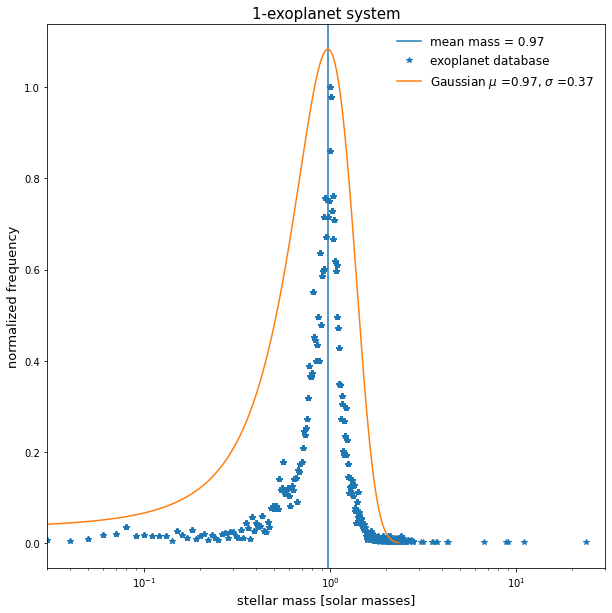

In [17]:
# plot distribution of stellar masses for a one-planet system and compare to Gaussian distribution

x = np.linspace(st.norm.ppf(0.01),st.norm.ppf(0.99), 1000) # use to generate gaussian
datamax = np.max(freq1) # use to normalize data

# estimate a standard deviation of the data
std = np.nanstd(st_mass1)
print(std)

# normalize data
normalized_freq = freq1 / datamax


plt.figure(figsize=(10,10))

plt.title('1-exoplanet system',fontsize=15)
plt.xlabel('stellar mass [solar masses]',fontsize=13)
plt.ylabel('normalized frequency',fontsize=13)
plt.xlim([3e-2, 3e1])
plt.axvline(x=mean1, label='mean mass = '+str(np.round(mean1,2)))

# plot stellar mass vs its frequency in database for one-planet systems
plt.semilogx(st_mass1, normalized_freq, '*', label='exoplanet database')

# generate and plot gaussian w/ same mean and standard deviation as data
plt.semilogx(x,st.norm.pdf(x,loc=mean1,scale=std), label='Gaussian $\mu$ ='+str(np.round(mean1,2))+', $\sigma$ ='+str(np.round(std,2),))

plt.legend(fontsize=12,frameon=False)

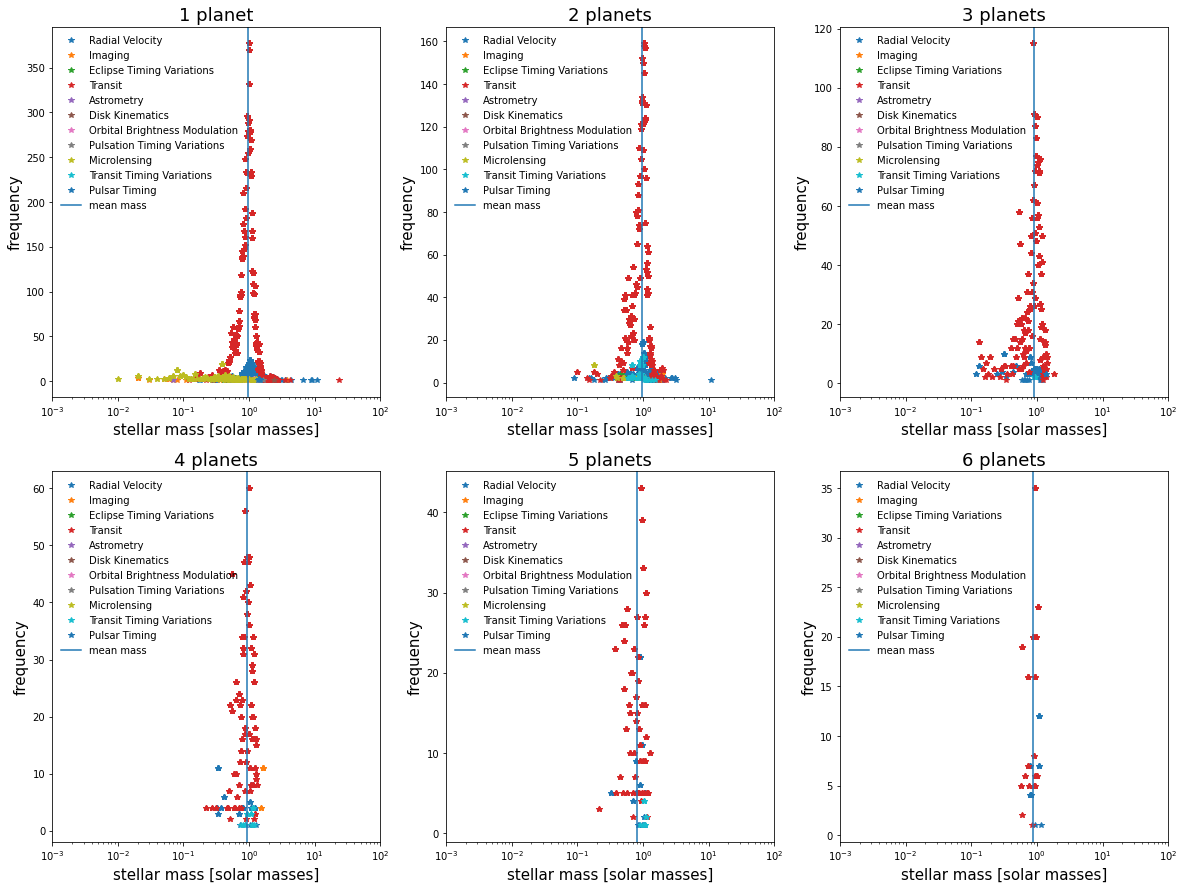

In [18]:
# plot all distributions, with differentiated detection methods

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
plt.title('1 planet', fontsize=18)
plt.xlabel('stellar mass [solar masses]',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.xlim([1e-3, 1e2])
plt.semilogx(rv_mass1, rv_freq1, '*', label='Radial Velocity')
plt.semilogx(im_mass1, im_freq1, '*', label='Imaging')
plt.semilogx(ect_mass1, ect_freq1, '*', label='Eclipse Timing Variations')
plt.semilogx(tran_mass1, tran_freq1, '*', label='Transit')
plt.semilogx(ast_mass1, ast_freq1, '*', label='Astrometry')
plt.semilogx(disk_mass1, disk_freq1, '*', label='Disk Kinematics')
plt.semilogx(obm_mass1, obm_freq1, '*', label='Orbital Brightness Modulation')
plt.semilogx(ptv_mass1, ptv_freq1, '*', label='Pulsation Timing Variations')
plt.semilogx(mic_mass1, mic_freq1, '*', label='Microlensing')
plt.semilogx(ttv_mass1, ttv_freq1, '*', label='Transit Timing Variations')
plt.semilogx(pult_mass1, pult_freq1, '*', label='Pulsar Timing')
plt.axvline(x=mean1, label='mean mass')
plt.legend(frameon=False)

plt.subplot(2,3,2)
plt.title('2 planets', fontsize=18)
plt.xlabel('stellar mass [solar masses]',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.semilogx(rv_mass2, rv_freq2, '*', label='Radial Velocity')
plt.semilogx(im_mass2, im_freq2, '*', label='Imaging')
plt.semilogx(ect_mass2, ect_freq2, '*', label='Eclipse Timing Variations')
plt.semilogx(tran_mass2, tran_freq2, '*', label='Transit')
plt.semilogx(ast_mass2, ast_freq2, '*', label='Astrometry')
plt.semilogx(disk_mass2, disk_freq2, '*', label='Disk Kinematics')
plt.semilogx(obm_mass2, obm_freq2, '*', label='Orbital Brightness Modulation')
plt.semilogx(ptv_mass2, ptv_freq2, '*', label='Pulsation Timing Variations')
plt.semilogx(mic_mass2, mic_freq2, '*', label='Microlensing')
plt.semilogx(ttv_mass2, ttv_freq2, '*', label='Transit Timing Variations')
plt.semilogx(pult_mass2, pult_freq2, '*', label='Pulsar Timing')
plt.axvline(mean2, label='mean mass')
plt.xlim([1e-3, 1e2])
plt.legend(frameon=False)

plt.subplot(2,3,3)
plt.title('3 planets',fontsize=18)
plt.xlabel('stellar mass [solar masses]',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.semilogx(rv_mass3, rv_freq3, '*', label='Radial Velocity')
plt.semilogx(im_mass3, im_freq3, '*', label='Imaging')
plt.semilogx(ect_mass3, ect_freq3, '*', label='Eclipse Timing Variations')
plt.semilogx(tran_mass3, tran_freq3, '*', label='Transit')
plt.semilogx(ast_mass3, ast_freq3, '*', label='Astrometry')
plt.semilogx(disk_mass3, disk_freq3, '*', label='Disk Kinematics')
plt.semilogx(obm_mass3, obm_freq3, '*', label='Orbital Brightness Modulation')
plt.semilogx(ptv_mass3, ptv_freq3, '*', label='Pulsation Timing Variations')
plt.semilogx(mic_mass3, mic_freq3, '*', label='Microlensing')
plt.semilogx(ttv_mass3, ttv_freq3, '*', label='Transit Timing Variations')
plt.semilogx(pult_mass3, pult_freq3, '*', label='Pulsar Timing')
plt.axvline(mean3, label='mean mass')
plt.xlim([1e-3, 1e2])
plt.legend(frameon=False)

plt.subplot(2,3,4)
plt.title('4 planets',fontsize=18)
plt.xlabel('stellar mass [solar masses]',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.semilogx(rv_mass4, rv_freq4, '*', label='Radial Velocity')
plt.semilogx(im_mass4, im_freq4, '*', label='Imaging')
plt.semilogx(ect_mass4, ect_freq4, '*', label='Eclipse Timing Variations')
plt.semilogx(tran_mass4, tran_freq4, '*', label='Transit')
plt.semilogx(ast_mass4, ast_freq4, '*', label='Astrometry')
plt.semilogx(disk_mass4, disk_freq4, '*', label='Disk Kinematics')
plt.semilogx(obm_mass4, obm_freq4, '*', label='Orbital Brightness Modulation')
plt.semilogx(ptv_mass4, ptv_freq4, '*', label='Pulsation Timing Variations')
plt.semilogx(mic_mass4, mic_freq4, '*', label='Microlensing')
plt.semilogx(ttv_mass4, ttv_freq4, '*', label='Transit Timing Variations')
plt.semilogx(pult_mass4, pult_freq4, '*', label='Pulsar Timing')
plt.axvline(mean4, label='mean mass')
plt.xlim([1e-3, 1e2])
plt.legend(frameon=False)

plt.subplot(2,3,5)
plt.title('5 planets',fontsize=18)
plt.xlabel('stellar mass [solar masses]',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.semilogx(rv_mass5, rv_freq5, '*', label='Radial Velocity')
plt.semilogx(im_mass5, im_freq5, '*', label='Imaging')
plt.semilogx(ect_mass5, ect_freq5, '*', label='Eclipse Timing Variations')
plt.semilogx(tran_mass5, tran_freq5, '*', label='Transit')
plt.semilogx(ast_mass5, ast_freq5, '*', label='Astrometry')
plt.semilogx(disk_mass5, disk_freq5, '*', label='Disk Kinematics')
plt.semilogx(obm_mass5, obm_freq5, '*', label='Orbital Brightness Modulation')
plt.semilogx(ptv_mass5, ptv_freq5, '*', label='Pulsation Timing Variations')
plt.semilogx(mic_mass5, mic_freq5, '*', label='Microlensing')
plt.semilogx(ttv_mass5, ttv_freq5, '*', label='Transit Timing Variations')
plt.semilogx(pult_mass5, pult_freq5, '*', label='Pulsar Timing')
plt.axvline(mean5, label='mean mass')
plt.xlim([1e-3, 1e2])
plt.legend(frameon=False)

plt.subplot(2,3,6)
plt.title('6 planets',fontsize=18)
plt.xlabel('stellar mass [solar masses]',fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.semilogx(rv_mass6, rv_freq6, '*', label='Radial Velocity')
plt.semilogx(im_mass6, im_freq6, '*', label='Imaging')
plt.semilogx(ect_mass6, ect_freq6, '*', label='Eclipse Timing Variations')
plt.semilogx(tran_mass6, tran_freq6, '*', label='Transit')
plt.semilogx(ast_mass6, ast_freq6, '*', label='Astrometry')
plt.semilogx(disk_mass6, disk_freq6, '*', label='Disk Kinematics')
plt.semilogx(obm_mass6, obm_freq6, '*', label='Orbital Brightness Modulation')
plt.semilogx(ptv_mass6, ptv_freq6, '*', label='Pulsation Timing Variations')
plt.semilogx(mic_mass6, mic_freq6, '*', label='Microlensing')
plt.semilogx(ttv_mass6, ttv_freq6, '*', label='Transit Timing Variations')
plt.semilogx(pult_mass6, pult_freq6, '*', label='Pulsar Timing')
plt.axvline(mean6, label='mean mass')
plt.xlim([1e-3, 1e2])
plt.legend(frameon=False)

# populations with 7-8 planets were not plotted because they have so few datapoints and are less meaningful